In [1]:

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, Activation, Reshape
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


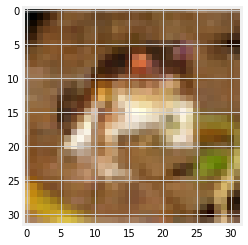

In [4]:
img=plt.imshow(x_train[0])

In [5]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

In [8]:
  model=Sequential()
  model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=x_train.shape[1:]))
  model.add(Conv2D(32, (3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
  model.add(Conv2D(64, (3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(1024, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(512, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation="softmax"))
  

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [10]:
epochs = 100
batch_size = 128
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train_one_hot, batch_size=batch_size, epochs=epochs,
                  validation_data=(x_test, y_test_one_hot),
                  shuffle=True, verbose=2)

Epoch 1/100
391/391 - 4s - loss: 1.9997 - accuracy: 0.2583 - val_loss: 1.6915 - val_accuracy: 0.4062
Epoch 2/100
391/391 - 3s - loss: 1.6843 - accuracy: 0.3874 - val_loss: 1.5459 - val_accuracy: 0.4354
Epoch 3/100
391/391 - 3s - loss: 1.5496 - accuracy: 0.4335 - val_loss: 1.4027 - val_accuracy: 0.4914
Epoch 4/100
391/391 - 3s - loss: 1.4531 - accuracy: 0.4730 - val_loss: 1.3838 - val_accuracy: 0.4992
Epoch 5/100
391/391 - 3s - loss: 1.3822 - accuracy: 0.5013 - val_loss: 1.2602 - val_accuracy: 0.5474
Epoch 6/100
391/391 - 3s - loss: 1.3265 - accuracy: 0.5252 - val_loss: 1.2327 - val_accuracy: 0.5628
Epoch 7/100
391/391 - 3s - loss: 1.2784 - accuracy: 0.5423 - val_loss: 1.1929 - val_accuracy: 0.5749
Epoch 8/100
391/391 - 3s - loss: 1.2305 - accuracy: 0.5626 - val_loss: 1.1566 - val_accuracy: 0.5895
Epoch 9/100
391/391 - 3s - loss: 1.1892 - accuracy: 0.5774 - val_loss: 1.0826 - val_accuracy: 0.6172
Epoch 10/100
391/391 - 3s - loss: 1.1440 - accuracy: 0.5965 - val_loss: 1.0499 - val_accura

In [12]:
model.save('cifar-model.h5')

In [13]:
y_pred = model.predict(x_test)

In [14]:
y_pred_label = np.argmax(y_pred, axis=1)

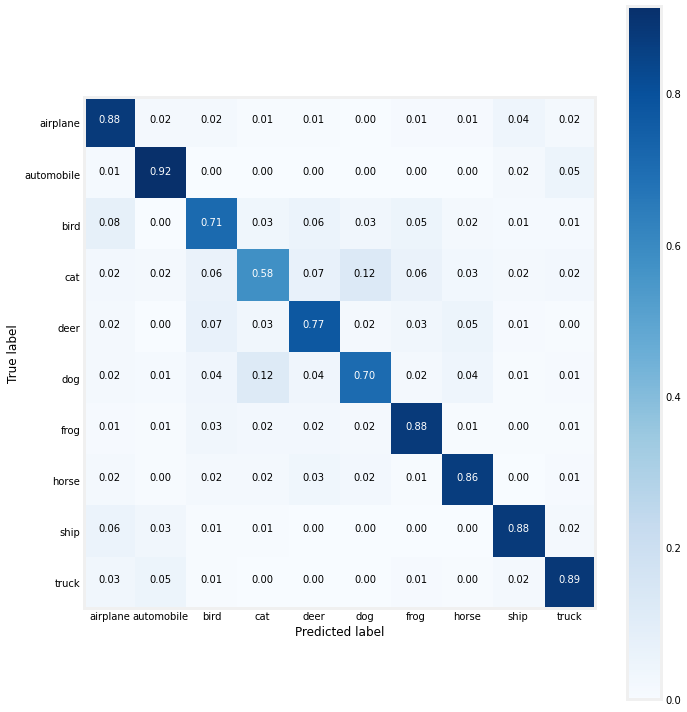

In [15]:
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_label)
cm = cnf_matrix.astype('float32')/cnf_matrix.sum(axis=1)
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
tick_marks = np.arange(10)
plt.xticks(tick_marks, [classification[i] for i in range(10)])
plt.yticks(tick_marks, [classification[i] for i in range(10)])
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(False)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'uppper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


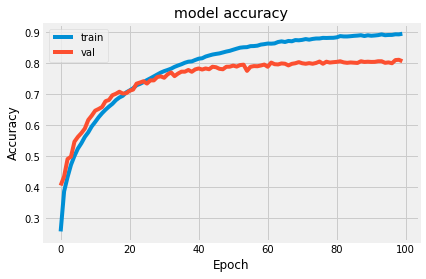

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc='uppper right')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'uppper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


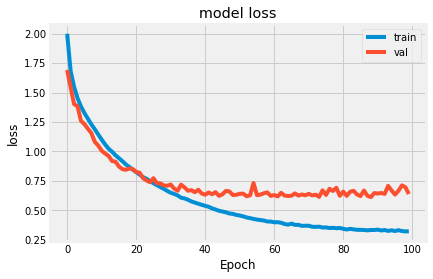

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','val'],loc='uppper right')
plt.show()

In [19]:
#test the model
from google.colab import files
upload=files.upload()

Saving 5KvPB.jpg to 5KvPB (1).jpg


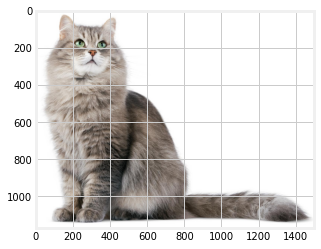

In [20]:
new_image=plt.imread("5KvPB.jpg")
img=plt.imshow(new_image)

In [21]:
from skimage.transform import resize

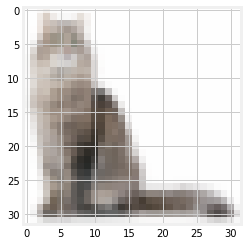

In [22]:
resize_image=resize(new_image,(32,32,3))
img=plt.imshow(resize_image)

In [24]:
predictions=model.predict(np.array([resize_image]))
predictions

array([[0.01936822, 0.01594376, 0.03169966, 0.69419247, 0.07759101,
        0.0389492 , 0.00627422, 0.05685085, 0.02915196, 0.02997872]],
      dtype=float32)

In [25]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[j]] > x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp
print(list_index)      

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [31]:
for i in range(5):
  print(classification[list_index[i]],':',predictions[0][list_index[i]]*100,'%')

airplane : 1.9368216395378113 %
automobile : 1.5943758189678192 %
bird : 3.1699661165475845 %
cat : 69.41924691200256 %
deer : 7.759100943803787 %
